In [1]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random


# Create your connection.
cnx = sqlite3.connect('TraidingStrategyethdata4_60s_All.db')

df = pd.read_sql_query("SELECT * FROM data", cnx)

In [2]:
df['date_open'] = pd.to_datetime(df['date_open'], unit="s")
df['date_close'] = pd.to_datetime(df['date_close'], unit="s")
df['date_open_month'] = df['date_open'].dt.month
df['date_close_month'] = df['date_close'].dt.month
df['date_open_day'] = df['date_open'].dt.day
df['date_close_day'] = df['date_close'].dt.day
df['date_open_hour'] = df['date_open'].dt.hour
df['date_close_hour'] = df['date_close'].dt.hour
df['date_open_min'] = df['date_open'].dt.minute
df['date_close_min'] = df['date_close'].dt.minute

In [10]:
first_list_needed_fitures = ['deal_type', 'price_open', 'price_close','balance_before', 'balance_after', 'balance_after_max',
       'balance_after_min', 'profit', 'profit_percent', 'balance_before_nofee',
       'balance_after_nofee', 'profit_nofee', 'marker', 
       'date_open_month', 'date_close_month', 'date_open_day',
       'date_close_day', 'date_open_hour', 'date_close_hour', 'date_open_min',
       'date_close_min']

In [11]:
predicts_=[]
facts_=[]

    
D_final = 0.7
needed_random = 0


period = 8
X = df.loc[:726-period,:]
y = df.loc[period:,['profit_percent']]

X_new=[]


for i in range(0,len(X)-period,1):
    k1 = X.loc[i:i+period,first_list_needed_fitures].values

    X_new.append([item for sublist in k1 for item in sublist])

y_new = df.loc[period:,['profit_percent']]


In [12]:
train_size = 300
test_size = 100



X_train, X_test, y_train, y_test = X_new[:500], X_new[500:600], y_new[:500], y_new[500:600]
print('длина тестовых x и y', len(X_test),len(y_test))


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)




for j in range(0,200):

    regr = MLPRegressor(verbose = False,
            hidden_layer_sizes = (100,100,100,100,100,100,100,100,100,100,100,8),
            max_iter = 1000, random_state=j,
            tol=0.00001).fit(X_train, y_train.values.reshape(-1))

    D = regr.score(scaler.transform(X_test[:period*5]), y_test[:period*5])
 
  
    
    if D > D_final:
            
        D_final = D
      
        needed_random = j

print(D_final)




длина тестовых x и y 100 100
-0.004715812026846233
-0.29813515109779254
0.30199141433960164
0.21426777973828037
0.6458738349748583
0.29829303869588364
0.6618890837345409
0.5697021517699645
0.7255150805783976
0.7255150805783976
-0.8234762547713099
0.8049831582271124
0.8049831582271124
-0.08537454560536051
0.7296091651947151
0.339683166032125
0.7731954134806494
0.29594943229354687
0.42884045993346676
0.42944365244163873
-0.019069054398433982
0.5726089401250057
0.6254162142236074
0.23824135591259366
0.8508410391533571
0.8508410391533571
0.3588208401234976
0.7809195853726143
0.5033622166909972
0.47771842211767124
0.7974135526635658
-1.7001925461100749
0.6919503956387434
0.6725146393641999
-0.8643280661699522
-8.80344063777984
0.6735926577474044
0.24335405378065167
0.5996331846040097
-0.5571578759649138
0.3980668781579225
0.7745893096250271
0.37608776510234987
0.6836569877788818
0.6220265739959091
0.8856855151095728
0.8856855151095728
0.6615086862866206
-0.3343173665780883
0.306437278982067

In [19]:
D_final

0.8856855151095728

In [17]:
y_pred = regr.predict(scaler.transform(X_test[:100]))

In [14]:
y_test[:10].values.ravel()

array([-0.04093022, -0.03029195,  0.12965625, -0.02660448, -0.00370227,
       -0.02730196, -0.02033656, -0.03023015, -0.03192115, -0.02005464])

In [16]:
y_pred

array([ 0.00754034, -0.00233869,  0.07999816,  0.00911088,  0.0124725 ,
       -0.00808702, -0.01336893, -0.01694128, -0.00358006, -0.0061421 ])

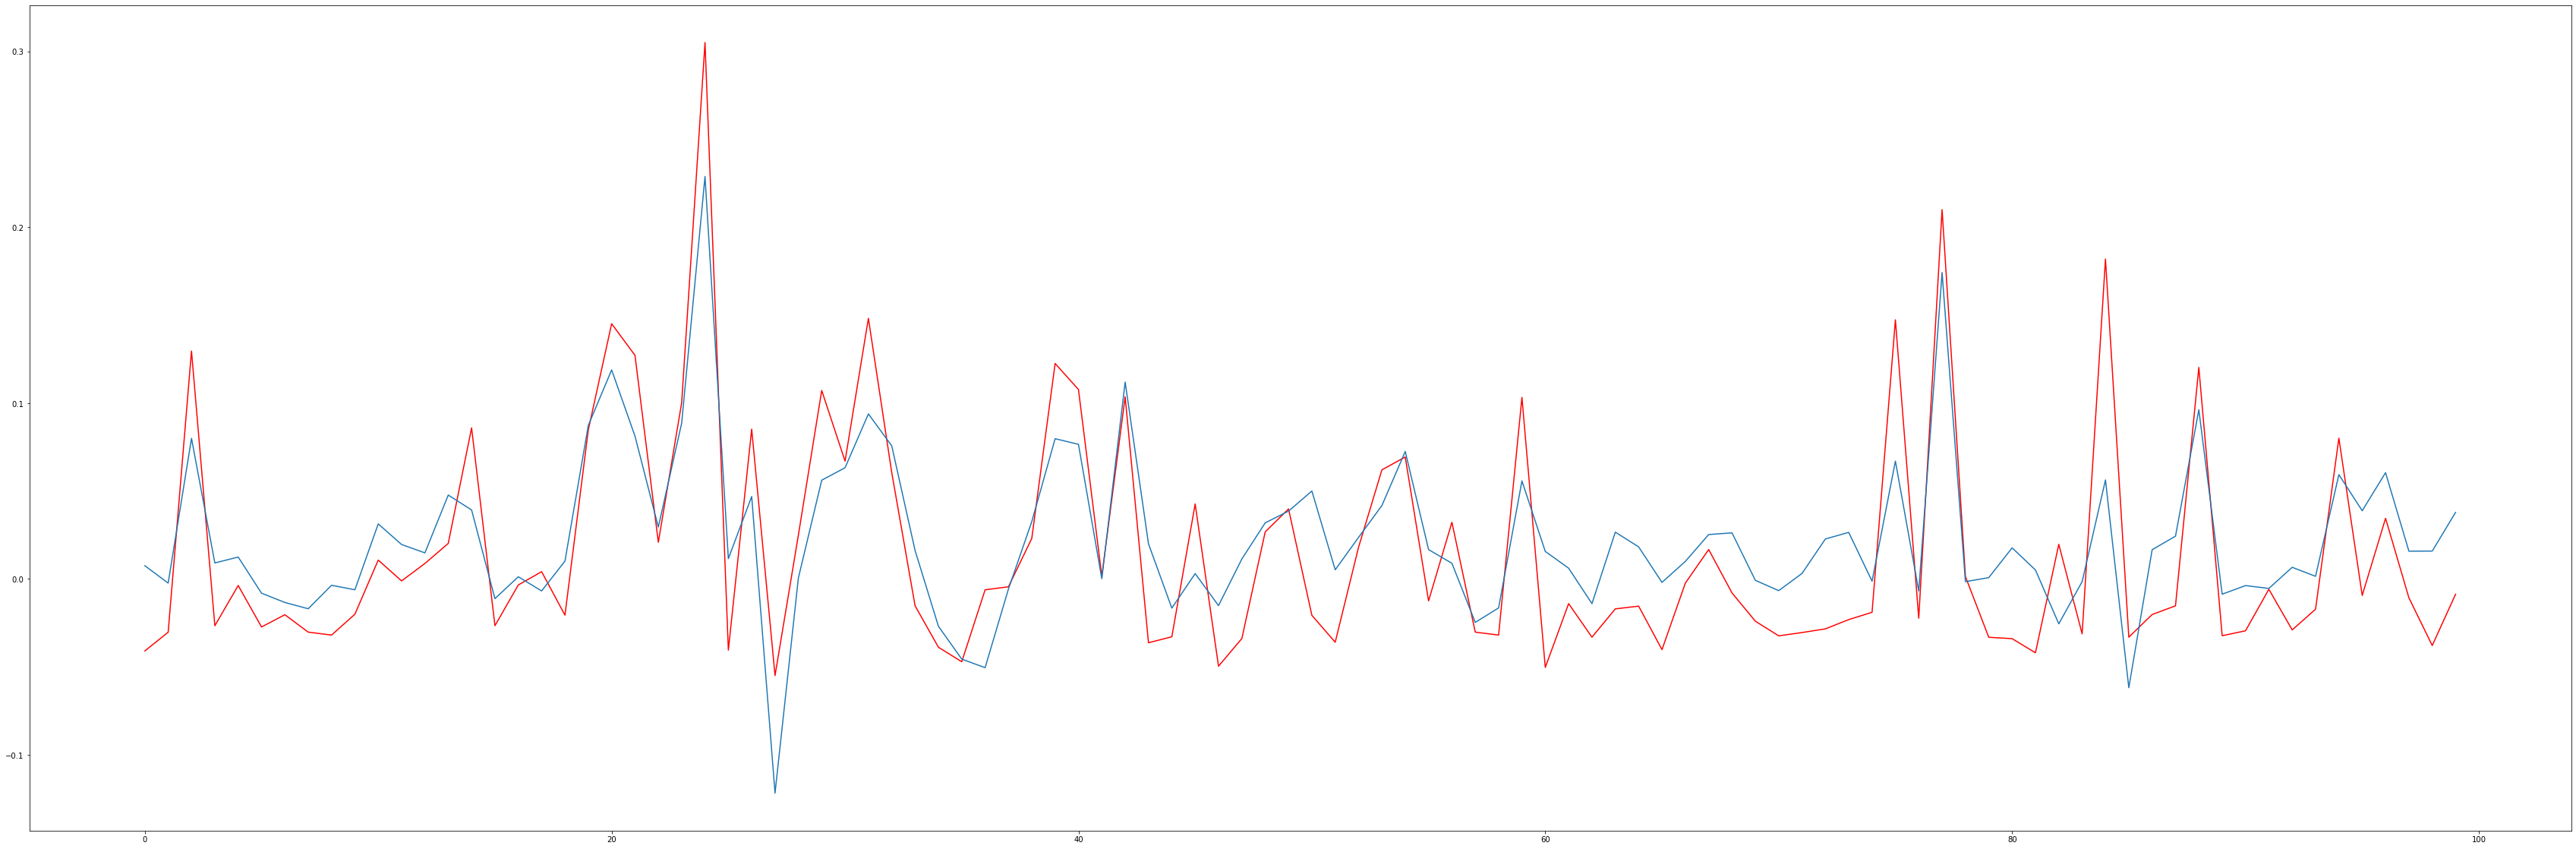

In [18]:
plt.figure(figsize=(60,20))
plt.plot(np.arange(0,len(y_test.values.ravel())),y_test.values.ravel(),'red')
plt.plot(np.arange(0,len(y_pred)),y_pred)
plt.show()